<a href="https://colab.research.google.com/github/Samuela31/Deep-Learning-Laboratory/blob/main/DL_Lab_9_GAN_for_Image_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Reshape
from keras.layers import LeakyReLU
from keras.optimizers import Adam

# Load and preprocess the MNIST dataset
(X_train, _), (_, _) = mnist.load_data()
X_train = (X_train.astype(np.float32) - 127.5) / 127.5  # Normalize the images to [-1, 1]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)  # Reshape to include the channel dimension


11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
def build_generator():
    model = Sequential()

    model.add(Dense(256, input_dim=100))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(28 * 28 * 1, activation='tanh'))
    model.add(Reshape((28, 28, 1)))

    return model

generator = build_generator()
generator.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               25856     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 1024)              525312    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 784)               8

In [ ]:
def build_discriminator():
    model = Sequential()

    model.add(Flatten(input_shape=(28, 28, 1)))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))

    return model

discriminator = build_discriminator()
discriminator.summary()

discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 1)                 257       
                                                                 
Total params: 533505 (2.04 MB)
Trainable params: 53350

In [ ]:
def build_gan(generator, discriminator):
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

discriminator.trainable = False  # Freeze the discriminator during the generator training
gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))
gan.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 28, 28, 1)         1486352   
                                                                 
 sequential_1 (Sequential)   (None, 1)                 533505    
                                                                 
Total params: 2019857 (7.71 MB)
Trainable params: 1486352 (5.67 MB)
Non-trainable params: 533505 (2.04 MB)
_________________________________________________________________


1/1 [==============================] - 0s 195ms/step
0 [D loss: 0.8052844703197479, acc.: 25.00%] [G loss: 0.71744704246521]
1/1 [==============================] - 0s 90ms/step
Shape of generated images: (10, 28, 28, 1)


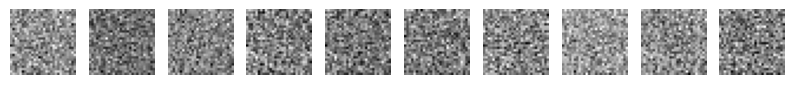

1/1 [==============================] - 0s 18ms/step
1 [D loss: 0.5442979037761688, acc.: 50.00%] [G loss: 0.5546263456344604]
1/1 [==============================] - 0s 17ms/step
2 [D loss: 0.5841032192111015, acc.: 50.00%] [G loss: 0.44797825813293457]
1/1 [==============================] - 0s 19ms/step
3 [D loss: 0.6703810598701239, acc.: 50.00%] [G loss: 0.39779579639434814]
1/1 [==============================] - 0s 18ms/step
4 [D loss: 0.6986492294818163, acc.: 50.00%] [G loss: 0.3563521206378937]
1/1 [==============================] - 0s 17ms/step
5 [D loss: 0.7193187773227692, acc.: 50.00%] [G loss: 0.3764292001724243]
1/1 [==============================] - 0s 20ms/step
6 [D loss: 0.7135754758492112, acc.: 50.00%] [G loss: 0.39962178468704224]
1/1 [==============================] - 0s 31ms/step
7 [D loss: 0.6779490653425455, acc.: 50.00%] [G loss: 0.4612315893173218]
1/1 [==============================] - 0s 28ms/step
8 [D loss: 0.6085571050643921, acc.: 50.00%] [G loss: 0.5477942

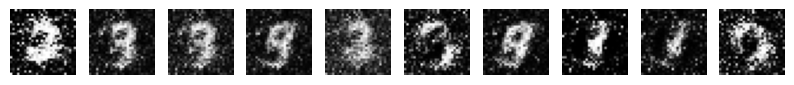

1/1 [==============================] - 0s 18ms/step
1001 [D loss: 0.5793906152248383, acc.: 68.75%] [G loss: 1.1521456241607666]
1/1 [==============================] - 0s 21ms/step
1002 [D loss: 0.5229809880256653, acc.: 84.38%] [G loss: 1.2379294633865356]
1/1 [==============================] - 0s 19ms/step
1003 [D loss: 0.6048674583435059, acc.: 70.31%] [G loss: 1.176674485206604]
1/1 [==============================] - 0s 18ms/step
1004 [D loss: 0.5645247101783752, acc.: 68.75%] [G loss: 1.1133747100830078]
1/1 [==============================] - 0s 19ms/step
1005 [D loss: 0.6076589971780777, acc.: 71.88%] [G loss: 1.2616850137710571]
1/1 [==============================] - 0s 18ms/step
1006 [D loss: 0.5543791949748993, acc.: 71.88%] [G loss: 1.2440743446350098]
1/1 [==============================] - 0s 18ms/step
1007 [D loss: 0.6338127255439758, acc.: 62.50%] [G loss: 1.1838912963867188]
1/1 [==============================] - 0s 19ms/step
1008 [D loss: 0.49468404054641724, acc.: 85.94

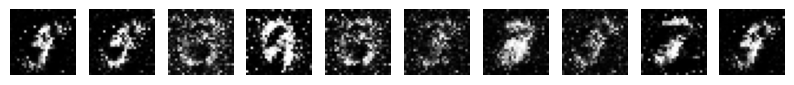

1/1 [==============================] - 0s 31ms/step
2001 [D loss: 0.6116346120834351, acc.: 78.12%] [G loss: 1.5046980381011963]
1/1 [==============================] - 0s 32ms/step
2002 [D loss: 0.46564680337905884, acc.: 81.25%] [G loss: 1.7727150917053223]
1/1 [==============================] - 0s 20ms/step
2003 [D loss: 0.47076812386512756, acc.: 85.94%] [G loss: 1.588995099067688]
1/1 [==============================] - 0s 21ms/step
2004 [D loss: 0.5359250009059906, acc.: 71.88%] [G loss: 1.3698018789291382]
1/1 [==============================] - 0s 21ms/step
2005 [D loss: 0.49980053305625916, acc.: 81.25%] [G loss: 1.4007422924041748]
1/1 [==============================] - 0s 20ms/step
2006 [D loss: 0.46097053587436676, acc.: 82.81%] [G loss: 1.6521103382110596]
1/1 [==============================] - 0s 20ms/step
2007 [D loss: 0.5509853363037109, acc.: 67.19%] [G loss: 1.560107946395874]
1/1 [==============================] - 0s 20ms/step
2008 [D loss: 0.5394680500030518, acc.: 75.

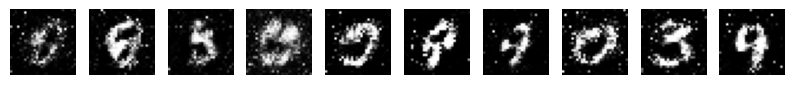

1/1 [==============================] - 0s 21ms/step
3001 [D loss: 0.5315699279308319, acc.: 73.44%] [G loss: 1.3106763362884521]
1/1 [==============================] - 0s 21ms/step
3002 [D loss: 0.49467484652996063, acc.: 73.44%] [G loss: 1.300229549407959]
1/1 [==============================] - 0s 19ms/step
3003 [D loss: 0.5086048394441605, acc.: 79.69%] [G loss: 1.1764864921569824]
1/1 [==============================] - 0s 21ms/step
3004 [D loss: 0.5574423968791962, acc.: 71.88%] [G loss: 1.2189655303955078]
1/1 [==============================] - 0s 25ms/step
3005 [D loss: 0.5225725173950195, acc.: 71.88%] [G loss: 1.2005950212478638]
1/1 [==============================] - 0s 24ms/step
3006 [D loss: 0.5251582860946655, acc.: 73.44%] [G loss: 1.2120822668075562]
1/1 [==============================] - 0s 23ms/step
3007 [D loss: 0.5281569957733154, acc.: 78.12%] [G loss: 1.4347550868988037]
1/1 [==============================] - 0s 21ms/step
3008 [D loss: 0.4339456260204315, acc.: 84.38

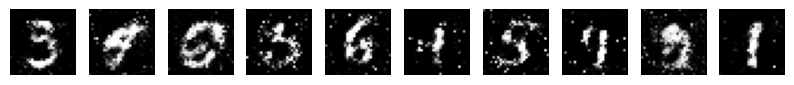

1/1 [==============================] - 0s 24ms/step
4001 [D loss: 0.6307770907878876, acc.: 67.19%] [G loss: 1.0244967937469482]
1/1 [==============================] - 0s 19ms/step
4002 [D loss: 0.5907734334468842, acc.: 71.88%] [G loss: 0.9681512117385864]
1/1 [==============================] - 0s 20ms/step
4003 [D loss: 0.5148360431194305, acc.: 78.12%] [G loss: 1.114656925201416]
1/1 [==============================] - 0s 18ms/step
4004 [D loss: 0.6253657341003418, acc.: 65.62%] [G loss: 1.0746064186096191]
1/1 [==============================] - 0s 24ms/step
4005 [D loss: 0.6646049618721008, acc.: 57.81%] [G loss: 1.0551388263702393]
1/1 [==============================] - 0s 23ms/step
4006 [D loss: 0.6039255857467651, acc.: 70.31%] [G loss: 1.0364573001861572]
1/1 [==============================] - 0s 20ms/step
4007 [D loss: 0.6623034775257111, acc.: 54.69%] [G loss: 1.0559399127960205]
1/1 [==============================] - 0s 19ms/step
4008 [D loss: 0.5527017712593079, acc.: 75.00%

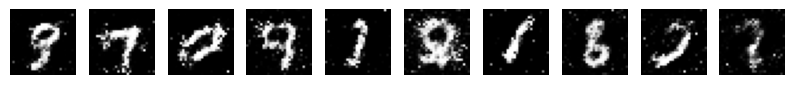

1/1 [==============================] - 0s 21ms/step
5001 [D loss: 0.6402142643928528, acc.: 62.50%] [G loss: 1.0885941982269287]
1/1 [==============================] - 0s 21ms/step
5002 [D loss: 0.7540417611598969, acc.: 50.00%] [G loss: 0.9434148073196411]
1/1 [==============================] - 0s 22ms/step
5003 [D loss: 0.6461273431777954, acc.: 65.62%] [G loss: 0.9323731660842896]
1/1 [==============================] - 0s 29ms/step
5004 [D loss: 0.591779500246048, acc.: 73.44%] [G loss: 0.9198459982872009]
1/1 [==============================] - 0s 25ms/step
5005 [D loss: 0.6503015756607056, acc.: 57.81%] [G loss: 0.8844093084335327]
1/1 [==============================] - 0s 20ms/step
5006 [D loss: 0.6518620848655701, acc.: 62.50%] [G loss: 1.0125768184661865]
1/1 [==============================] - 0s 20ms/step
5007 [D loss: 0.6588384509086609, acc.: 62.50%] [G loss: 0.9238883256912231]
1/1 [==============================] - 0s 19ms/step
5008 [D loss: 0.6477374136447906, acc.: 60.94%

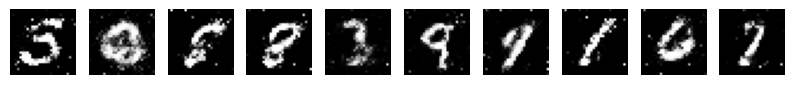

1/1 [==============================] - 0s 23ms/step
6001 [D loss: 0.5887400805950165, acc.: 73.44%] [G loss: 1.0202770233154297]
1/1 [==============================] - 0s 20ms/step
6002 [D loss: 0.6289648115634918, acc.: 59.38%] [G loss: 0.8780515193939209]
1/1 [==============================] - 0s 20ms/step
6003 [D loss: 0.6384611427783966, acc.: 62.50%] [G loss: 0.9494643211364746]
1/1 [==============================] - 0s 22ms/step
6004 [D loss: 0.6412078142166138, acc.: 65.62%] [G loss: 0.9415618777275085]
1/1 [==============================] - 0s 19ms/step
6005 [D loss: 0.6534189879894257, acc.: 57.81%] [G loss: 1.012312412261963]
1/1 [==============================] - 0s 20ms/step
6006 [D loss: 0.6382946372032166, acc.: 62.50%] [G loss: 0.9395289421081543]
1/1 [==============================] - 0s 20ms/step
6007 [D loss: 0.6631723046302795, acc.: 67.19%] [G loss: 1.0142866373062134]
1/1 [==============================] - 0s 21ms/step
6008 [D loss: 0.5856062173843384, acc.: 68.75%

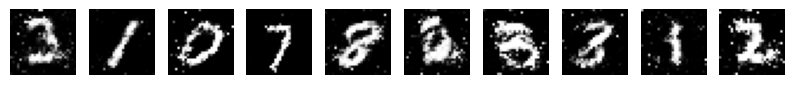

1/1 [==============================] - 0s 25ms/step
7001 [D loss: 0.716516375541687, acc.: 54.69%] [G loss: 0.9974997043609619]
1/1 [==============================] - 0s 19ms/step
7002 [D loss: 0.6582753360271454, acc.: 60.94%] [G loss: 0.9571301937103271]
1/1 [==============================] - 0s 18ms/step
7003 [D loss: 0.7093188762664795, acc.: 59.38%] [G loss: 0.9379664659500122]
1/1 [==============================] - 0s 20ms/step
7004 [D loss: 0.6615711152553558, acc.: 56.25%] [G loss: 0.9821209907531738]
1/1 [==============================] - 0s 28ms/step
7005 [D loss: 0.6235812902450562, acc.: 64.06%] [G loss: 1.0804625749588013]
1/1 [==============================] - 0s 29ms/step
7006 [D loss: 0.7067595422267914, acc.: 53.12%] [G loss: 0.9443391561508179]
1/1 [==============================] - 0s 34ms/step
7007 [D loss: 0.5823757648468018, acc.: 70.31%] [G loss: 0.9736474752426147]
1/1 [==============================] - 0s 34ms/step
7008 [D loss: 0.6202237904071808, acc.: 59.38%

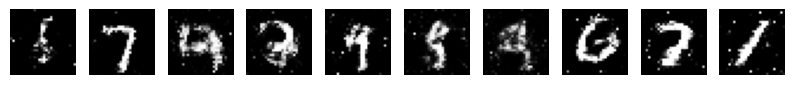

1/1 [==============================] - 0s 23ms/step
8001 [D loss: 0.6023157835006714, acc.: 70.31%] [G loss: 1.023472547531128]
1/1 [==============================] - 0s 19ms/step
8002 [D loss: 0.6254916191101074, acc.: 73.44%] [G loss: 0.9451875686645508]
1/1 [==============================] - 0s 24ms/step
8003 [D loss: 0.6788240373134613, acc.: 57.81%] [G loss: 0.9142067432403564]
1/1 [==============================] - 0s 24ms/step
8004 [D loss: 0.6125146150588989, acc.: 65.62%] [G loss: 0.970557689666748]
1/1 [==============================] - 0s 28ms/step
8005 [D loss: 0.6443669199943542, acc.: 59.38%] [G loss: 1.0640263557434082]
1/1 [==============================] - 0s 26ms/step
8006 [D loss: 0.6456185579299927, acc.: 67.19%] [G loss: 0.9532644152641296]
1/1 [==============================] - 0s 32ms/step
8007 [D loss: 0.5902326703071594, acc.: 70.31%] [G loss: 0.9648889303207397]
1/1 [==============================] - 0s 28ms/step
8008 [D loss: 0.5804277658462524, acc.: 67.19%]

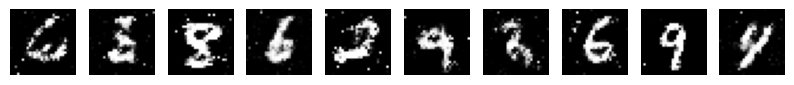

1/1 [==============================] - 0s 22ms/step
9001 [D loss: 0.645684003829956, acc.: 65.62%] [G loss: 0.8757137060165405]
1/1 [==============================] - 0s 23ms/step
9002 [D loss: 0.6562902629375458, acc.: 54.69%] [G loss: 0.89139324426651]
1/1 [==============================] - 0s 30ms/step
9003 [D loss: 0.5903642177581787, acc.: 70.31%] [G loss: 0.9638606309890747]
1/1 [==============================] - 0s 31ms/step
9004 [D loss: 0.6133529841899872, acc.: 62.50%] [G loss: 0.9553117752075195]
1/1 [==============================] - 0s 32ms/step
9005 [D loss: 0.6846776008605957, acc.: 51.56%] [G loss: 0.9337180852890015]
1/1 [==============================] - 0s 28ms/step
9006 [D loss: 0.6839241981506348, acc.: 60.94%] [G loss: 0.9938828349113464]
1/1 [==============================] - 0s 23ms/step
9007 [D loss: 0.6044556796550751, acc.: 73.44%] [G loss: 0.9695350527763367]
1/1 [==============================] - 0s 28ms/step
9008 [D loss: 0.6952032446861267, acc.: 56.25%] 

In [ ]:
def train_gan(epochs, batch_size, save_interval):
    half_batch = batch_size // 2

    for epoch in range(epochs):
        # Train the discriminator with real images
        idx = np.random.randint(0, X_train.shape[0], half_batch)
        real_images = X_train[idx]

        noise = np.random.normal(0, 1, (half_batch, 100))
        fake_images = generator.predict(noise)

        d_loss_real = discriminator.train_on_batch(real_images, np.ones((half_batch, 1)))
        d_loss_fake = discriminator.train_on_batch(fake_images, np.zeros((half_batch, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train the generator
        noise = np.random.normal(0, 1, (batch_size, 100))
        valid_y = np.array([1] * batch_size)

        g_loss = gan.train_on_batch(noise, valid_y)

        # Print the progress
        print(f"{epoch} [D loss: {d_loss[0]}, acc.: {100*d_loss[1]:.2f}%] [G loss: {g_loss}]")

        # If at save interval, save generated image samples
        if epoch % save_interval == 0:
            save_images(epoch)

def save_images(epoch, num_examples=10, dim=(1, 10), figsize=(10, 1)):
    noise = np.random.normal(0, 1, (num_examples, 100))
    generated_images = generator.predict(noise)

    # Debug: Print shape of generated_images
    print(f"Shape of generated images: {generated_images.shape}")

    generated_images = 0.5 * generated_images + 0.5  # Rescale to [0, 1]

    fig, axs = plt.subplots(dim[0], dim[1], figsize=figsize)

    # If axs is 1D (dim[0] == 1), we need to handle it accordingly
    if dim[0] == 1:
        axs = np.expand_dims(axs, 0)

    cnt = 0
    for i in range(dim[0]):
        for j in range(dim[1]):
            axs[i, j].imshow(generated_images[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1
    plt.show()

# Train the GAN
train_gan(epochs=10000, batch_size=64, save_interval=1000)


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.models import Model

In [ ]:
import tensorflow as tf
import numpy as np
from scipy.stats import entropy
from scipy.linalg import sqrtm

def convert_to_rgb(images):
    return np.repeat(images, 3, axis=-1)

def inception_score(images, splits=10):
    assert (type(images) == np.ndarray)
    assert (len(images.shape) == 4)
    assert (np.max(images) <= 1)
    assert (np.min(images) >= 0)

    images_rgb = convert_to_rgb(images)

    model = tf.keras.applications.InceptionV3(include_top=True, weights='imagenet')
    images_resized = tf.image.resize(images_rgb, (299, 299))
    preds = model.predict(images_resized)

    scores = []
    for i in range(splits):
        part = preds[i * preds.shape[0] // splits: (i + 1) * preds.shape[0] // splits, :]
        kl = part * (np.log(part) - np.log(np.expand_dims(np.mean(part, 0), 0)))
        kl = np.mean(np.sum(kl, axis=1))
        scores.append(np.exp(kl))

    return np.mean(scores), np.std(scores)

def calculate_fid(real_images, generated_images):
    assert real_images.shape == generated_images.shape, "Real and generated images must have the same shape"

    real_images_rgb = convert_to_rgb(real_images)
    generated_images_rgb = convert_to_rgb(generated_images)

    # Load InceptionV3 model
    model = InceptionV3(include_top=False, pooling='avg', input_shape=(299, 299, 3))

    # Resize and preprocess images
    real_images_resized = tf.image.resize(real_images_rgb, (299, 299))
    generated_images_resized = tf.image.resize(generated_images_rgb, (299, 299))
    real_images_preprocessed = tf.keras.applications.inception_v3.preprocess_input(real_images_resized)
    generated_images_preprocessed = tf.keras.applications.inception_v3.preprocess_input(generated_images_resized)

    # Get the activations from the model
    act_real = model.predict(real_images_preprocessed)
    act_generated = model.predict(generated_images_preprocessed)

    # Calculate the mean and covariance of the activations
    mu_real, sigma_real = act_real.mean(axis=0), np.cov(act_real, rowvar=False)
    mu_generated, sigma_generated = act_generated.mean(axis=0), np.cov(act_generated, rowvar=False)

    # Calculate the Fréchet distance
    ssdiff = np.sum((mu_real - mu_generated) ** 2.0)
    covmean = sqrtm(sigma_real.dot(sigma_generated))

    if np.iscomplexobj(covmean):
        covmean = covmean.real

    fid = ssdiff + np.trace(sigma_real + sigma_generated - 2.0 * covmean)
    return fid


In [ ]:
# Generate images using the GAN model
def generate_images(generator, num_images):
    noise = np.random.normal(0, 1, (num_images, 100))
    generated_images = generator.predict(noise)
    generated_images = 0.5 * generated_images + 0.5  # Rescale to [0, 1]
    return generated_images

# Prepare real images (use a subset of real images for evaluation)
num_eval_images = 1000
idx = np.random.randint(0, X_train.shape[0], num_eval_images)
real_images = X_train[idx]

# Generate images
num_generated_images = 1000
generated_images = generate_images(generator, num_generated_images)

# Evaluate Inception Score
is_mean, is_std = inception_score(generated_images)
print(f"Inception Score: {is_mean} ± {is_std}")

# Evaluate Fréchet Inception Distance
fid = calculate_fid(real_images, generated_images)
print(f"Fréchet Inception Distance: {fid}")


32/32 [==============================] - 214s 7s/step
Inception Score: 2.395537853240967 ± 0.10686542093753815
32/32 [==============================] - 207s 6s/step
Fréchet Inception Distance: -4.360587076901196e+64


1/1 [==============================] - 0s 33ms/step


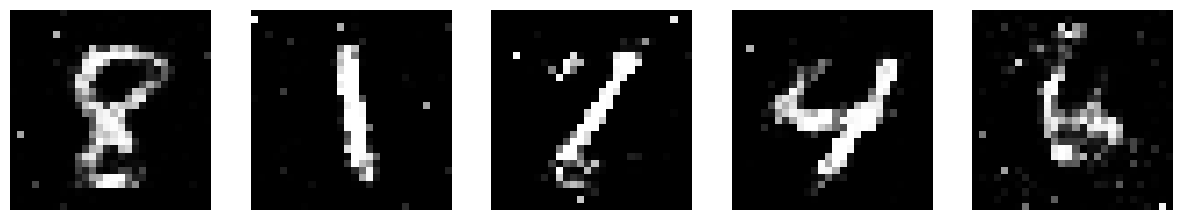

In [ ]:
# Generate 5 images using the trained GAN generator
num_images_to_generate = 5
generated_images = generate_images(generator, num_images_to_generate)

# Plot the generated images
plt.figure(figsize=(15, 3))

for i in range(num_images_to_generate):
    plt.subplot(1, num_images_to_generate, i + 1)
    plt.imshow(generated_images[i, :, :, 0], cmap='gray')
    plt.axis('off')

plt.show()